## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Make a Toy Dataset

In [2]:
n_data_per_class = 50
num_class = 2
dim_data = 2
n_data = n_data_per_class * num_class
n_train = 50

data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data_x = np.vstack([data1,data2])
data_y = np.vstack([np.ones((n_data_per_class,1)), -np.ones((n_data_per_class,1))])

## Visualization

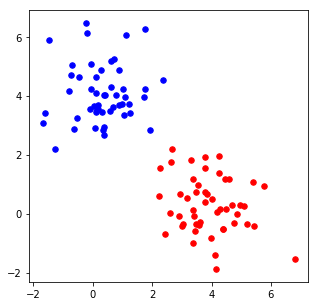

In [3]:
def draw_state(wval=None, bval=None):
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    if wval is not None and bval is not None:
        plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
draw_state()

# logistic regression model


### Likelihood for a Single Datum:
### $$P(y_i|x_i;w,b) = \frac{1}{1+exp(-(wx_i+b)y_i)}$$
### Learning by Minimizing the Negative Log-Likelihood:
### $$\mathcal{L}(w,b) = -\frac{1}{n}\sum_{i=1}^n log(P(y_i|x_i;w,b))$$
### $$w^*, b^* = \arg \min_{w,b} \mathcal{L}(w,b) $$

In [4]:
x = tf.placeholder(tf.float32, [None, dim_data], name='x')
w = tf.Variable(tf.ones([dim_data,1]), name='w')
b = tf.Variable(tf.zeros([1]), name='b')
y = tf.placeholder(tf.float32, [None, 1], name='y')

likelihood = tf.sigmoid( (tf.matmul(x, w) + b)*y, name='likelihood' )
loss = tf.reduce_mean(-tf.log(likelihood), name='loss')

## Gradient Descent Learning

In [8]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

## Open a Session and Initialize Variables

In [7]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

writer = tf.summary.FileWriter('logregress_log', sess.graph)
sess.run(tf.global_variables_initializer())


## Train the model

Epoch 0: Loss 2.22428178787


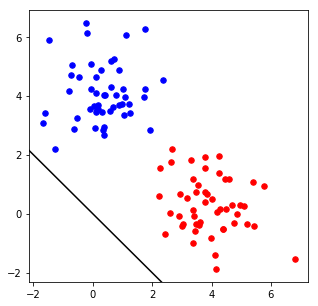

Epoch 1: Loss 0.426277250051


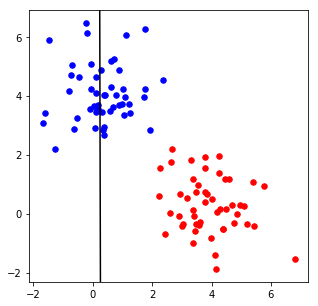

Epoch 2: Loss 0.109401538968


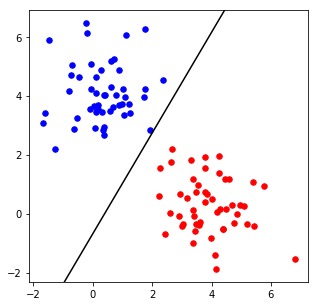

Epoch 3: Loss 0.0886162221432


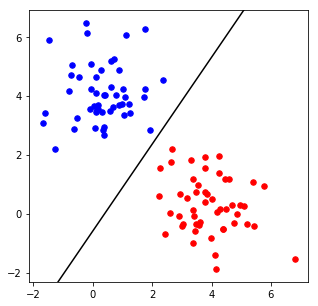

Epoch 4: Loss 0.0772382542491


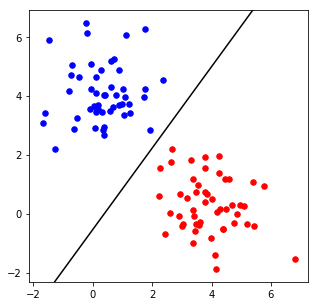

Epoch 5: Loss 0.0693678557873


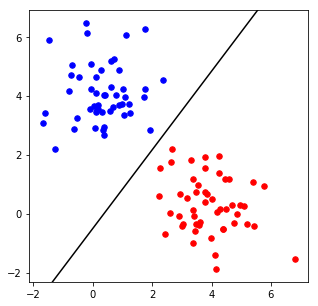

Epoch 6: Loss 0.0633863508701


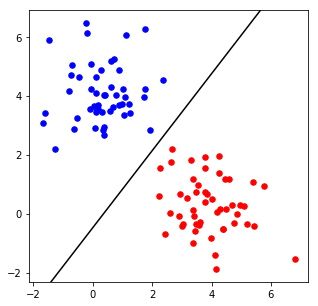

Epoch 7: Loss 0.0586095489562


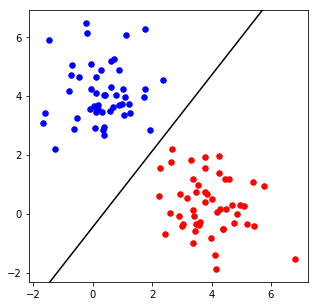

Epoch 8: Loss 0.0546736419201


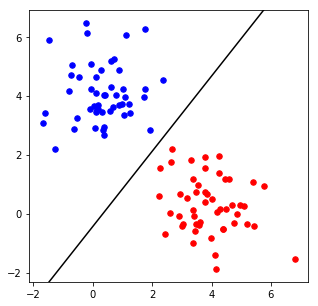

Epoch 9: Loss 0.0513577833772


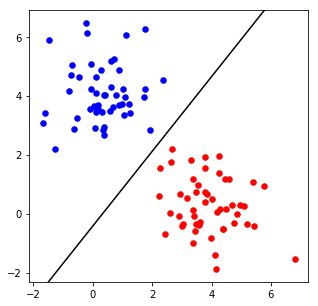

Epoch 10: Loss 0.0485165528953


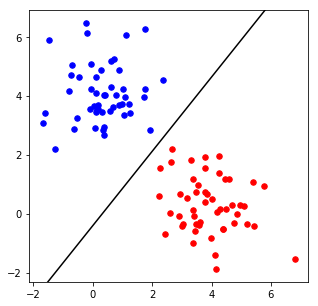

Epoch 11: Loss 0.0460487082601


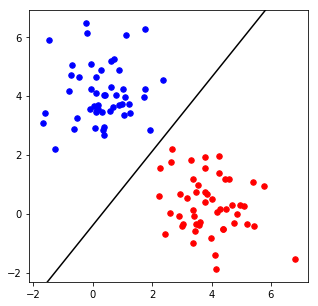

Epoch 12: Loss 0.04388102144


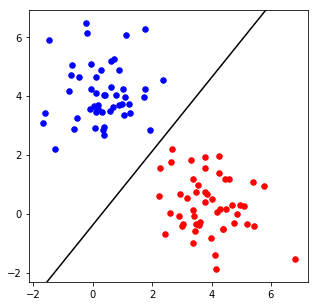

Epoch 13: Loss 0.041958861053


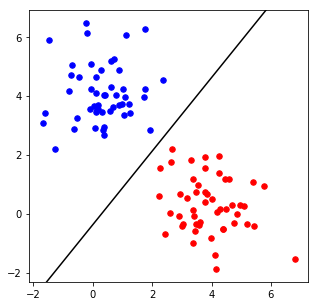

Epoch 14: Loss 0.0402404889464


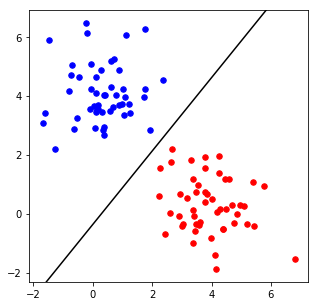

Epoch 15: Loss 0.0386933647096


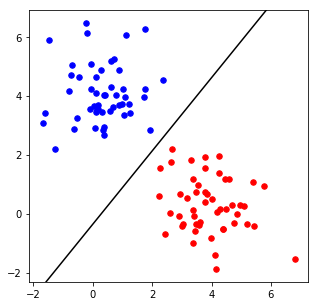

Epoch 16: Loss 0.0372917130589


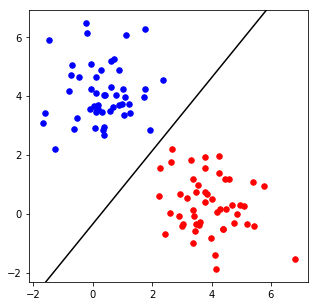

Epoch 17: Loss 0.0360148325562


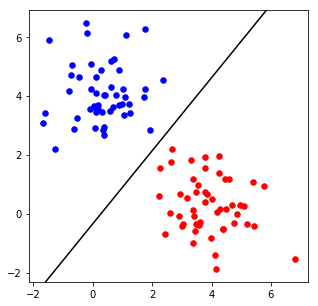

Epoch 18: Loss 0.0348458662629


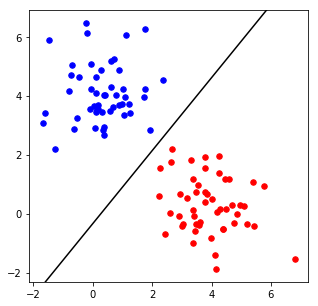

Epoch 19: Loss 0.0337709262967


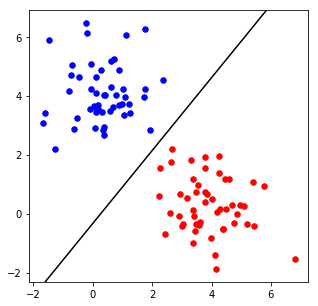

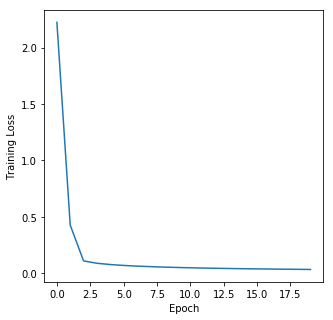

In [9]:
idx =[2*i for i in range(50)]

loss_history = []
for epoch in range(20):
    train_x = data_x
    train_y = data_y
    _, loss_val, w_val, b_val = sess.run([train_step, loss, w, b], feed_dict={x: train_x, y: train_y})
    loss_history.append( loss_val )
    print "Epoch {}: Loss {}".format(epoch, loss_val)
    draw_state(w_val, b_val)
    
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()